In [0]:
# import stuffs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load & clean dataframes

In [0]:
# load data
degrees= pd.read_csv('https://raw.githubusercontent.com/ccny-data/College_Major_Data/master/data/college-salaries/degrees-that-pay-back.csv')
colleges= pd.read_csv('https://raw.githubusercontent.com/ccny-data/College_Major_Data/master/data/college-salaries/salaries-by-college-type.csv')
regions= pd.read_csv('https://raw.githubusercontent.com/ccny-data/College_Major_Data/master/data/college-salaries/salaries-by-region.csv')


Let's look into all three datasets first

In [335]:
# dataset with salary info by degrees
degrees.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [336]:
# dataset with salary info by colleges
colleges.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [337]:
# dataset with salary info by region
regions.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


The datasets contain raw data.Need to be cleaned up in order to perform any computations on these.

In [0]:
# rename col names for easier interaction
degrees.columns = ["major","sms","mcms","delta_sms_mcms","mc10ps","mc25ps","mc75ps","mc90ps"]
colleges.columns = ["school","type","sms","mcms","mc10ps","mc25ps","mc75ps","mc90ps"]
regions.columns = ["school","region","sms","mcms","mc10ps","mc25ps","mc75ps","mc90ps"]

dataset = [degrees,colleges, regions]

In [0]:
# some of the cols have dollar sign, which need to be removed before any calculation done in those cols
# cols_with_dollar_sign = ["Starting Median Salary","Mid-Career Median Salary","Mid-Career 10th Percentile Salary","Mid-Career 25th Percentile Salary","Mid-Career 75th Percentile Salary","Mid-Career 90th Percentile Salary"]
cols_with_dollar_sign = ["sms","mcms","mc10ps","mc25ps","mc75ps","mc90ps"]

In [0]:
# make the data more calculation-friendly.

for d in dataset:
  for c in cols_with_dollar_sign:
    d[c] = d[c].str.replace(",","")   # drop comma
    d[c] = d[c].str.replace("$","")   # drop $
    d[c] = pd.to_numeric(d[c], errors="coerce")   # make nummeric
    
  d.fillna(0, inplace=True)  # drop NaN vals



# degrees dataframe

In [341]:
# let's check how it looks now
degrees.head()


,major,sms,mcms,delta_sms_mcms,mc10ps,mc25ps,mc75ps,mc90ps
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [363]:
# Percent change from Starting to Mid-Career Salary
degrees = degrees.sort_values("delta_sms_mcms", ascending=False)
degrees.head(10)

,major,sms,mcms,delta_sms_mcms,mc10ps,mc25ps,mc75ps,mc90ps
15,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0
9,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
16,International Relations,40900.0,80900.0,97.8,38200.0,56000.0,111000.0,157000.0
4,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
18,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0
5,Physics,50300.0,97300.0,93.4,56000.0,74200.0,132000.0,178000.0
20,Political Science,40800.0,78200.0,91.7,41200.0,55300.0,114000.0,168000.0
17,Chemistry,42600.0,79900.0,87.6,45300.0,60700.0,108000.0,148000.0
30,Journalism,35600.0,66700.0,87.4,38400.0,48300.0,97700.0,145000.0
22,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [343]:
 degrees.describe()

,sms,mcms,delta_sms_mcms,mc10ps,mc25ps,mc75ps,mc90ps
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


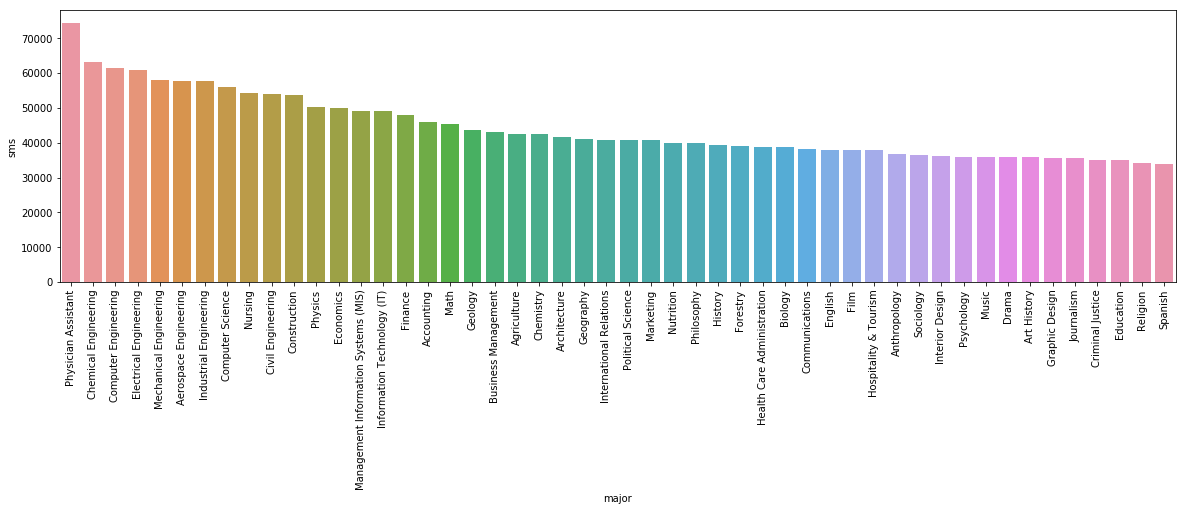

In [344]:
# fig. 1
# descending by Starting Median Salary
degrees = degrees.sort_values("sms", ascending=False).reset_index(drop=True)
f, ax = plt.subplots(figsize=(20, 5)) 
ax.set_xticklabels(degrees["major"], rotation="vertical", fontsize="medium")
g = sns.barplot(y = degrees["sms"], x= degrees["major"])
plt.show()

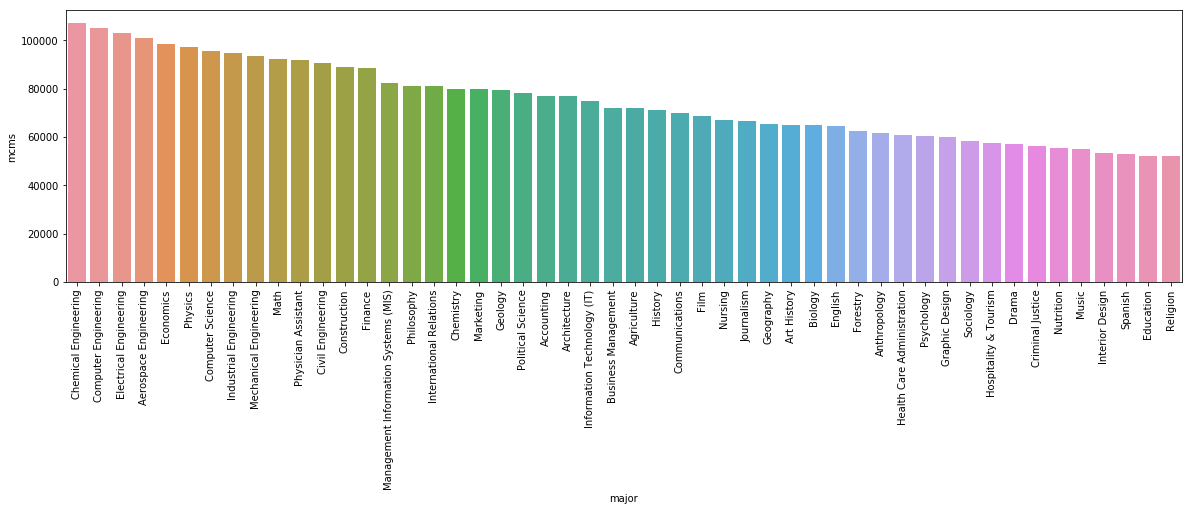

In [345]:
# fig. 2
# descending by Mid-Career Median Salary
degrees = degrees.sort_values("mcms", ascending=False).reset_index(drop=True)
f, ax = plt.subplots(figsize=(20, 5)) 
ax.set_xticklabels(degrees["major"], rotation="vertical", fontsize="medium")
g = sns.barplot(y = degrees["mcms"], x= degrees["major"])
plt.show()

Notes on fig. 1 and 2:
*   Engineering and IT majors are leading 

*   "Physician Assistant" has the highest mean starting salary. And it is significantly more than the second highest major. However, it's growth (Percent change from Starting to Mid-Career Salary) is very low, 23.4%, which is the lowest among all the majors in the dataset. 



In [361]:
degrees = degrees.sort_values("mc90ps", ascending=False)
degrees.head(10)

,major,sms,mcms,delta_sms_mcms,mc10ps,mc25ps,mc75ps,mc90ps
4,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
13,Finance,47900.0,88300.0,84.3,47200.0,62100.0,128000.0,195000.0
0,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0
9,Math,45400.0,92400.0,103.5,45200.0,64200.0,128000.0,183000.0
5,Physics,50300.0,97300.0,93.4,56000.0,74200.0,132000.0,178000.0
18,Marketing,40800.0,79600.0,95.1,42100.0,55600.0,119000.0,175000.0
7,Industrial Engineering,57700.0,94700.0,64.1,57100.0,72300.0,132000.0,173000.0
12,Construction,53700.0,88900.0,65.5,56300.0,68100.0,118000.0,171000.0
2,Electrical Engineering,60900.0,103000.0,69.1,69300.0,83800.0,130000.0,168000.0
15,Philosophy,39900.0,81200.0,103.5,35500.0,52800.0,127000.0,168000.0


# colleges dataframe

In [346]:
# overview the salaries-by-college-type dataset
colleges.head()

,school,type,sms,mcms,mc10ps,mc25ps,mc75ps,mc90ps
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,0.0,104000.0,161000.0,0.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,0.0,96000.0,180000.0,0.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,0.0,80200.0,142000.0,0.0


In [355]:
top_colleges = colleges.sort_values("sms", ascending=False)
top_colleges.head(10)

,school,type,sms,mcms,mc10ps,mc25ps,mc75ps,mc90ps
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,0.0,104000.0,161000.0,0.0
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,0.0,96000.0,180000.0,0.0
87,Princeton University,Ivy League,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0
89,Harvard University,Ivy League,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,0.0,80200.0,142000.0,0.0
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0


Notes: Engineering schools are leading the chart. Even beating the Ivy League schools for "Starting Median Salary"

In [359]:
top_colleges = colleges.sort_values("mcms", ascending=False)
top_colleges.head(10)

,school,type,sms,mcms,mc10ps,mc25ps,mc75ps,mc90ps
86,Dartmouth College,Ivy League,58000.0,134000.0,63100.0,90200.0,234000.0,321000.0
87,Princeton University,Ivy League,66500.0,131000.0,68900.0,100000.0,190000.0,261000.0
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
88,Yale University,Ivy League,59100.0,126000.0,58000.0,80600.0,198000.0,326000.0
89,Harvard University,Ivy League,63400.0,124000.0,54800.0,86200.0,179000.0,288000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,0.0,104000.0,161000.0,0.0
2,Harvey Mudd College,Engineering,71800.0,122000.0,0.0,96000.0,180000.0,0.0
90,University of Pennsylvania,Ivy League,60900.0,120000.0,55900.0,79200.0,192000.0,282000.0
4,Cooper Union,Engineering,62200.0,114000.0,0.0,80200.0,142000.0,0.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0


Notes: Ivy league number increased in top 10 schools. Making Ivy League and Engineering schools having equal number of spots on top 10 schools for "Mid-Career Median Salary"